## Predicted Rundown:
1. Dataset (iris dataset)
2. Classical
3. Quantum
4. try generalise

Dataset: iris from sk-learn

In [1]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(iris_data.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

- 150 samples
- 4 features
- three lables
- same number of samples (50) in each class

working with features and labels from the dataset

In [2]:
from sklearn.preprocessing import MinMaxScaler
features = iris_data.data
labels = iris_data.target

# normalise features
features = MinMaxScaler().fit_transform(features)
print(features)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

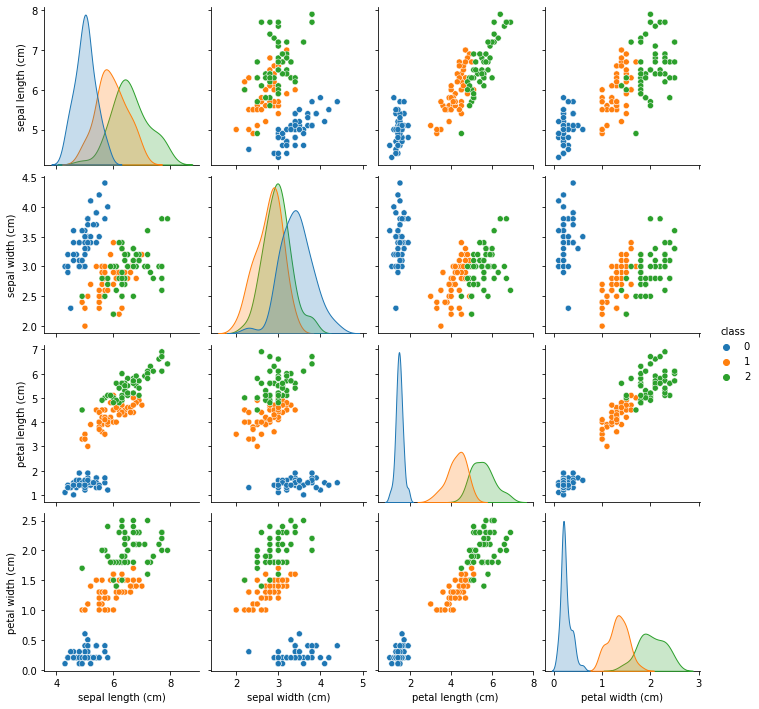

In [3]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df["class"] = pd.Series(iris_data.target)

sns.pairplot(df, hue="class", palette="tab10")

### Classical ML using Support Vector Classifier (SVC)

In [4]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals
from sklearn.svm import SVC
algorithm_globals.random_seed = 123

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

svc = SVC()
result = svc.fit(train_features, train_labels)

train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.99
Classical SVC on the test dataset:     0.97


### QML Model Variational Quantum Classifier (VQC)

- feature map
- ansatz

1. need encode data as qubits
- data encoding, data embedding, data loading
2. apply a parameterized quantum circuit
- analogous to classical neural nets --> minimising objective funciton
- parameterised trial state/variational form/ ansatz
3. post process 


c:\Users\ryanl\AppData\Local\Programs\Python\Python39\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


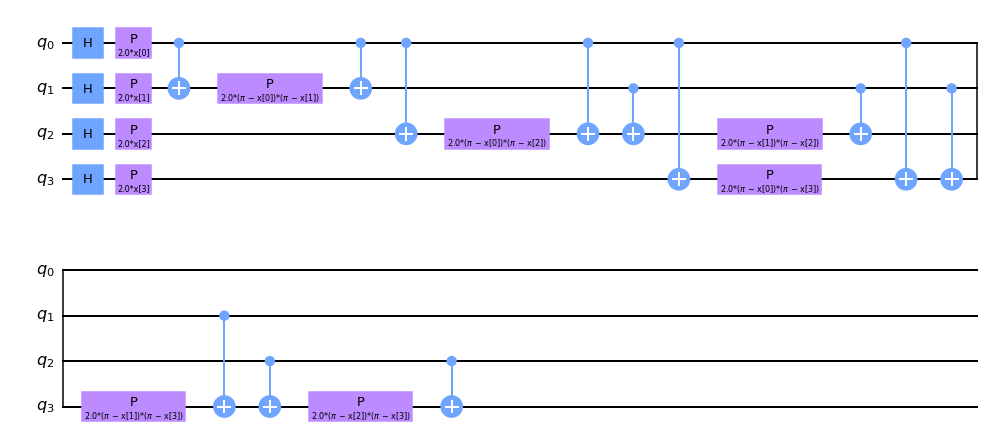

In [5]:
## feature map

from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1] # 4 features --> 4 qubits

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

ansatz

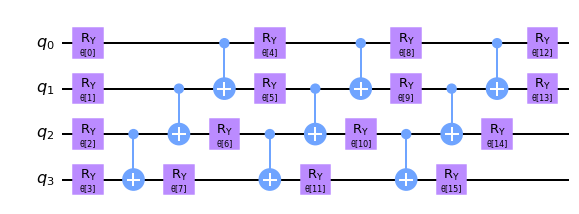

In [6]:
from qiskit.circuit.library import RealAmplitudes
# https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

$\theta[\{i = 1,2,...,15\}]$ --> training weights of classifiers

1. use optimisation algo to use in training process --> faster gradient-free optimiser
2. define where to train classifier --> create instance of `Sampler` (statevector based)
3. add callback function `callback_graph`
    - VQC calls this function for each eval
    - can plot iteration vs objective function value

In [7]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

from qiskit.primitives import Sampler

sampler = Sampler()
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

defining the variational quantum classifier (VQC)
- takes feature map --> constructs a quantum neural network automatically
- simplest case: enough to pass the number of qubits and a quantum instance to construct a valid classifier

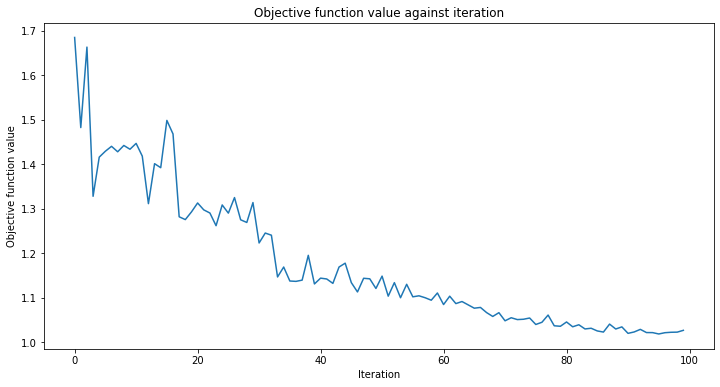

Training time: 183 seconds
Quantum VQC on the training dataset: 0.88
Quantum VQC on the test dataset:     0.90


In [10]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

See performance

improvements:
1. higher number of reps 
    - larger entanglement operations and more parameters
    - adds more complexity

2. try other optimisers

3. randomly/deterministically sample initial_point and fit the model several times.

### PCA for quantum model

<AxesSubplot:>

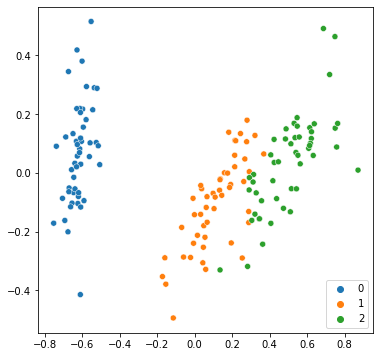

In [11]:
from sklearn.decomposition import PCA

features = PCA(n_components=2).fit_transform(features)
## plotting two features on a single figure
plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=labels, palette="tab10")

Fitting classical model

In [12]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

svc.fit(train_features, train_labels)

train_score_c2 = svc.score(train_features, train_labels)
test_score_c2 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c2:.2f}")

Classical SVC on the training dataset: 0.97
Classical SVC on the test dataset:     0.90


Fitting quantum model using a quantum classifier

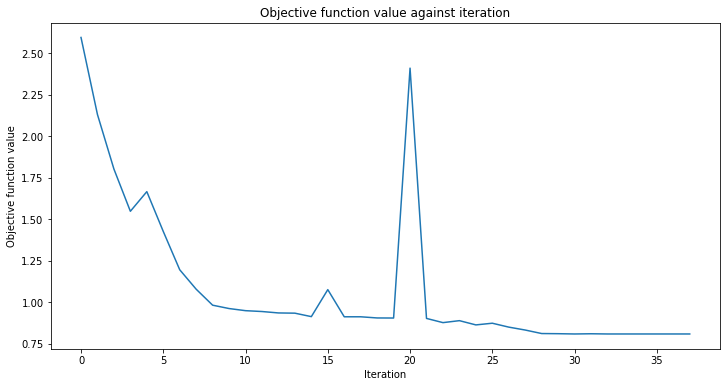

Training time: 628 seconds
Quantum VQC on the training dataset using EfficientSU2: 0.82
Quantum VQC on the test dataset using EfficientSU2:     0.80


In [15]:
num_features = features.shape[1]
from qiskit_algorithms.optimizers import L_BFGS_B
## recreating
from qiskit.circuit.library import EfficientSU2
## https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.EfficientSU2
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = EfficientSU2(num_qubits=num_features, reps=3)

optimizer = L_BFGS_B(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)


start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Overall summary

In [16]:
print(f"Model                           | Test Score | Train Score")
print(f"SVC, 4 features                 | {train_score_c4:10.2f} | {test_score_c4:10.2f}")
print(f"VQC, 4 features, RealAmplitudes | {train_score_q4:10.2f} | {test_score_q4:10.2f}")
print(f"----------------------------------------------------------")
print(f"SVC, 2 features                 | {train_score_c2:10.2f} | {test_score_c2:10.2f}")
print(f"VQC, 2 features, EfficientSU2   | {train_score_q2_eff:10.2f} | {test_score_q2_eff:10.2f}")

Model                           | Test Score | Train Score
SVC, 4 features                 |       0.99 |       0.97
VQC, 4 features, RealAmplitudes |       0.88 |       0.90
----------------------------------------------------------
SVC, 2 features                 |       0.97 |       0.90
VQC, 2 features, EfficientSU2   |       0.82 |       0.80
